In [1]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1


In [2]:
!pip install tensorflow==2.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 173.2 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 8.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 13.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboa

In [3]:
import tensorflow as tf
print(tf.__version__)

2024-12-03 08:11:14.547612: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl5mutex6unlockEv']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/usr/local/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by

2.10.0


In [4]:
#Data Science Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import itertools
import random

#visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#tf libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model, regularizers
# System libraries
from pathlib import Path
import os

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
import requests

# URL of the helper functions file
url = 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py'

# Download the file
response = requests.get(url)
with open('helper_functions.py', 'wb') as file:
    file.write(response.content)

In [6]:
# Import the helper functions
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

In [7]:
# Define the path to the dataset
ingredients_data = '/kaggle/input/kitchen-ingredients-classification'
walk_through_dir(ingredients_data)

There are 50 directories and 0 images in '/kaggle/input/kitchen-ingredients-classification'.
There are 0 directories and 111 images in '/kaggle/input/kitchen-ingredients-classification/jagung_manis'.
There are 0 directories and 120 images in '/kaggle/input/kitchen-ingredients-classification/pisang'.
There are 0 directories and 118 images in '/kaggle/input/kitchen-ingredients-classification/ubi_lobak'.
There are 0 directories and 121 images in '/kaggle/input/kitchen-ingredients-classification/ikan'.
There are 0 directories and 121 images in '/kaggle/input/kitchen-ingredients-classification/tempe'.
There are 0 directories and 120 images in '/kaggle/input/kitchen-ingredients-classification/udang'.
There are 0 directories and 101 images in '/kaggle/input/kitchen-ingredients-classification/wortel'.
There are 0 directories and 120 images in '/kaggle/input/kitchen-ingredients-classification/apel'.
There are 0 directories and 120 images in '/kaggle/input/kitchen-ingredients-classification/jale

In [8]:
img_directory = Path(ingredients_data)
filepaths = list(img_directory.glob(r'**/*.JPG')) + list(img_directory.glob(r'**/*.jpg')) + list(img_directory.glob(r'**/*.png')) + list(img_directory.glob(r'**/*.png')) + list(img_directory.glob(r'**/*.jpeg'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

In [9]:
image_df

,Filepath,Label
0,/kaggle/input/kitchen-ingredients-classificati...,jagung_manis
1,/kaggle/input/kitchen-ingredients-classificati...,jagung_manis
2,/kaggle/input/kitchen-ingredients-classificati...,jagung_manis
3,/kaggle/input/kitchen-ingredients-classificati...,pisang
4,/kaggle/input/kitchen-ingredients-classificati...,ubi_lobak
...,...,...
6209,/kaggle/input/kitchen-ingredients-classificati...,lobak
6210,/kaggle/input/kitchen-ingredients-classificati...,lobak
6211,/kaggle/input/kitchen-ingredients-classificati...,kubis
6212,/kaggle/input/kitchen-ingredients-classificati...,kubis


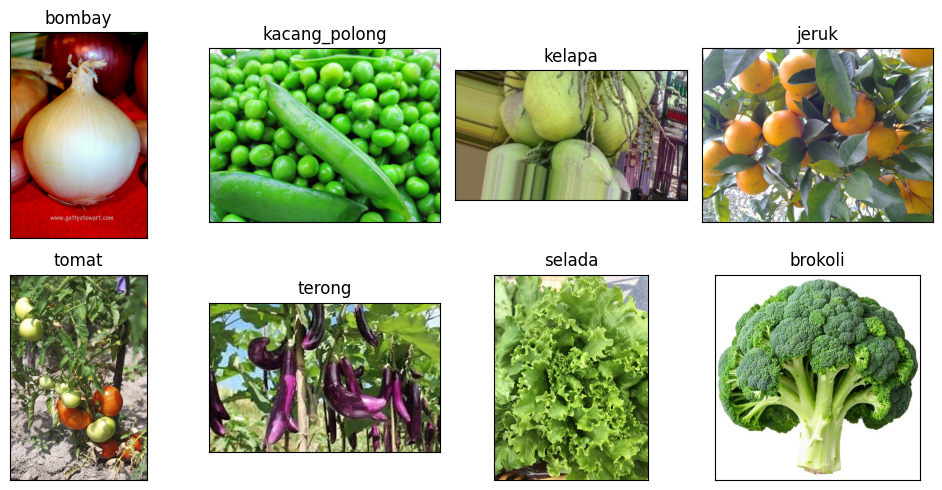

In [10]:
# Display 8 pictures of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 8)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 5),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    img = plt.imread(image_df['Filepath'].iloc[random_index[i]])
    ax.imshow(img)
    ax.set_title(image_df['Label'].iloc[random_index[i]])

plt.tight_layout()
plt.show()

In [11]:
#separate to training, validation, testing
training_dataset, testing_dataset = train_test_split(image_df, test_size=0.1, shuffle=True, random_state=1)

In [12]:
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input,
    validation_split=0.1
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v3.preprocess_input
)

In [13]:
training_images = train_generator.flow_from_dataframe(
dataframe = training_dataset,
x_col='Filepath',
y_col = 'Label',
target_size=(224,224),
color_mode='rgb',
class_mode='categorical',
batch_size=32,
shuffle=True,
seed=42,
subset='training')

validation_images = train_generator.flow_from_dataframe(
dataframe = training_dataset,
x_col='Filepath',
y_col = 'Label',
target_size=(224,224),
color_mode='rgb',
class_mode='categorical',
batch_size=32,
shuffle=True,
seed=42,
subset='validation')

test_images = test_generator.flow_from_dataframe(
dataframe = testing_dataset,
x_col='Filepath',
y_col = 'Label',
target_size=(224,224),
color_mode='rgb',
class_mode='categorical',
batch_size=32,
shuffle=False)

Found 5033 validated image filenames belonging to 50 classes.
Found 559 validated image filenames belonging to 50 classes.
Found 622 validated image filenames belonging to 50 classes.


In [14]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(224,224),
    tf.keras.layers.Rescaling(1./255),
])

augmented = keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomZoom(0.5),
    tf.keras.layers.RandomRotation(0.5),
    tf.keras.layers.RandomWidth(0.5),
    tf.keras.layers.RandomHeight(0.5),
    tf.keras.layers.RandomContrast(factor=0.4),
    tf.keras.layers.RandomBrightness(0.4),
], name="data_augmentation")

In [15]:
input_shape = (224,224,3)

Base_Model = tf.keras.applications.MobileNetV3Large(
input_shape = input_shape,
include_top = False,
    weights = 'imagenet',
    pooling = 'avg'
)
Base_Model.trainable = False

12683000/12683000 [==============================] - 1s 0us/step


In [16]:
# Extract the class indices from the training generator
class_indices = training_images.class_indices

# Save the class indices to a file for later use
import json
with open("class_indices.json", "w") as json_file:
    json.dump(class_indices, json_file)

In [17]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 5 epochs
early_stopping = EarlyStopping(monitor="val_accuracy", # watch the val loss metric
                                                  patience=10,
                                                  restore_best_weights=True) # if val loss decreases for 3 epochs in a row, stop training

In [18]:
checkpoint_path = "ingredients_classification_model_checkpoint.weights.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [19]:
def build_model(base_model, num_classes):
    input = base_model.input
    x = resize_and_rescale(input)
    x = augmented(x)
    x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(base_model.output)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=input, outputs=outputs)
    return model

In [20]:
model = build_model(Base_Model,50)

# Compile model with a lower learning rate
model.compile(
    optimizer=Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 if epoch > 20 else 1e-4)

In [22]:
print(f"Training samples: {training_images.n}, Batch size: {training_images.batch_size}")
print(f"Validation samples: {validation_images.n}, Batch size: {validation_images.batch_size}")

Training samples: 5033, Batch size: 32
Validation samples: 559, Batch size: 32


In [23]:
history = model.fit(
    training_images,
    steps_per_epoch=len(training_images),
    validation_data=validation_images,
    validation_steps=len(validation_images),
    epochs=100,
    callbacks=[early_stopping, checkpoint_callback, lr_schedule]
)

Epoch 1/100


/usr/local/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


158/158 [==============================] - 145s 893ms/step - loss: 9.3898 - accuracy: 0.0487 - val_loss: 8.1164 - val_accuracy: 0.2254 - lr: 1.0000e-04
Epoch 2/100
158/158 [==============================] - 117s 737ms/step - loss: 8.4401 - accuracy: 0.1196 - val_loss: 7.2848 - val_accuracy: 0.4436 - lr: 1.0000e-04
Epoch 3/100
158/158 [==============================] - 115s 730ms/step - loss: 7.7103 - accuracy: 0.2025 - val_loss: 6.6535 - val_accuracy: 0.5689 - lr: 1.0000e-04
Epoch 4/100
158/158 [==============================] - 116s 733ms/step - loss: 7.1046 - accuracy: 0.2841 - val_loss: 6.1682 - val_accuracy: 0.6744 - lr: 1.0000e-04
Epoch 5/100
158/158 [==============================] - 111s 704ms/step - loss: 6.6290 - accuracy: 0.3610 - val_loss: 5.7836 - val_accuracy: 0.7156 - lr: 1.0000e-04
Epoch 6/100
158/158 [==============================] - 114s 720ms/step - loss: 6.2456 - accuracy: 0.4123 - val_loss: 5.4236 - val_accuracy: 0.7513 - lr: 1.0000e-04
Epoch 7/100
158/158 [=======

In [24]:
results = model.evaluate(test_images, verbose=2)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

20/20 - 19s - loss: 2.3565 - accuracy: 0.8730 - 19s/epoch - 933ms/step
    Test Loss: 2.35649
Test Accuracy: 87.30%


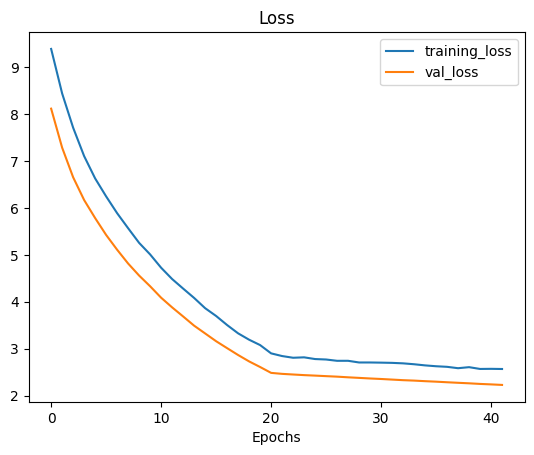

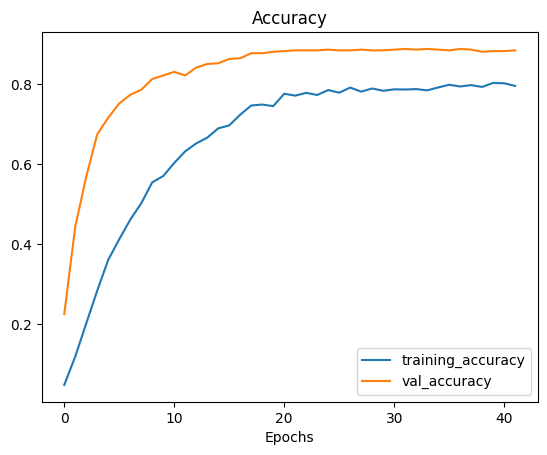

In [25]:
plot_loss_curves(history)

In [26]:
model.save('ingredients_classification_mobileNetV3.h5')

In [27]:
model.save('ingredients_classification_mobileNetV3.keras')

In [28]:
try:
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open('model.tflite', 'wb') as f:
        f.write(tflite_model)
    print("Model has been successfully converted and saved as 'model.tflite'")
except Exception as e:
    print(f"An error occurred during conversion: {e}")

INFO:tensorflow:Assets written to: /tmp/tmppf2wknk9/assets


INFO:tensorflow:Assets written to: /tmp/tmppf2wknk9/assets


Model has been successfully converted and saved as 'model.tflite'


In [29]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (training_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

 2/20 [==>...........................] - ETA: 13s

/usr/local/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 [==============================] - 16s 710ms/step
The first 5 predictions: ['anggur', 'jeruk', 'belimbing', 'tomat', 'kentang']


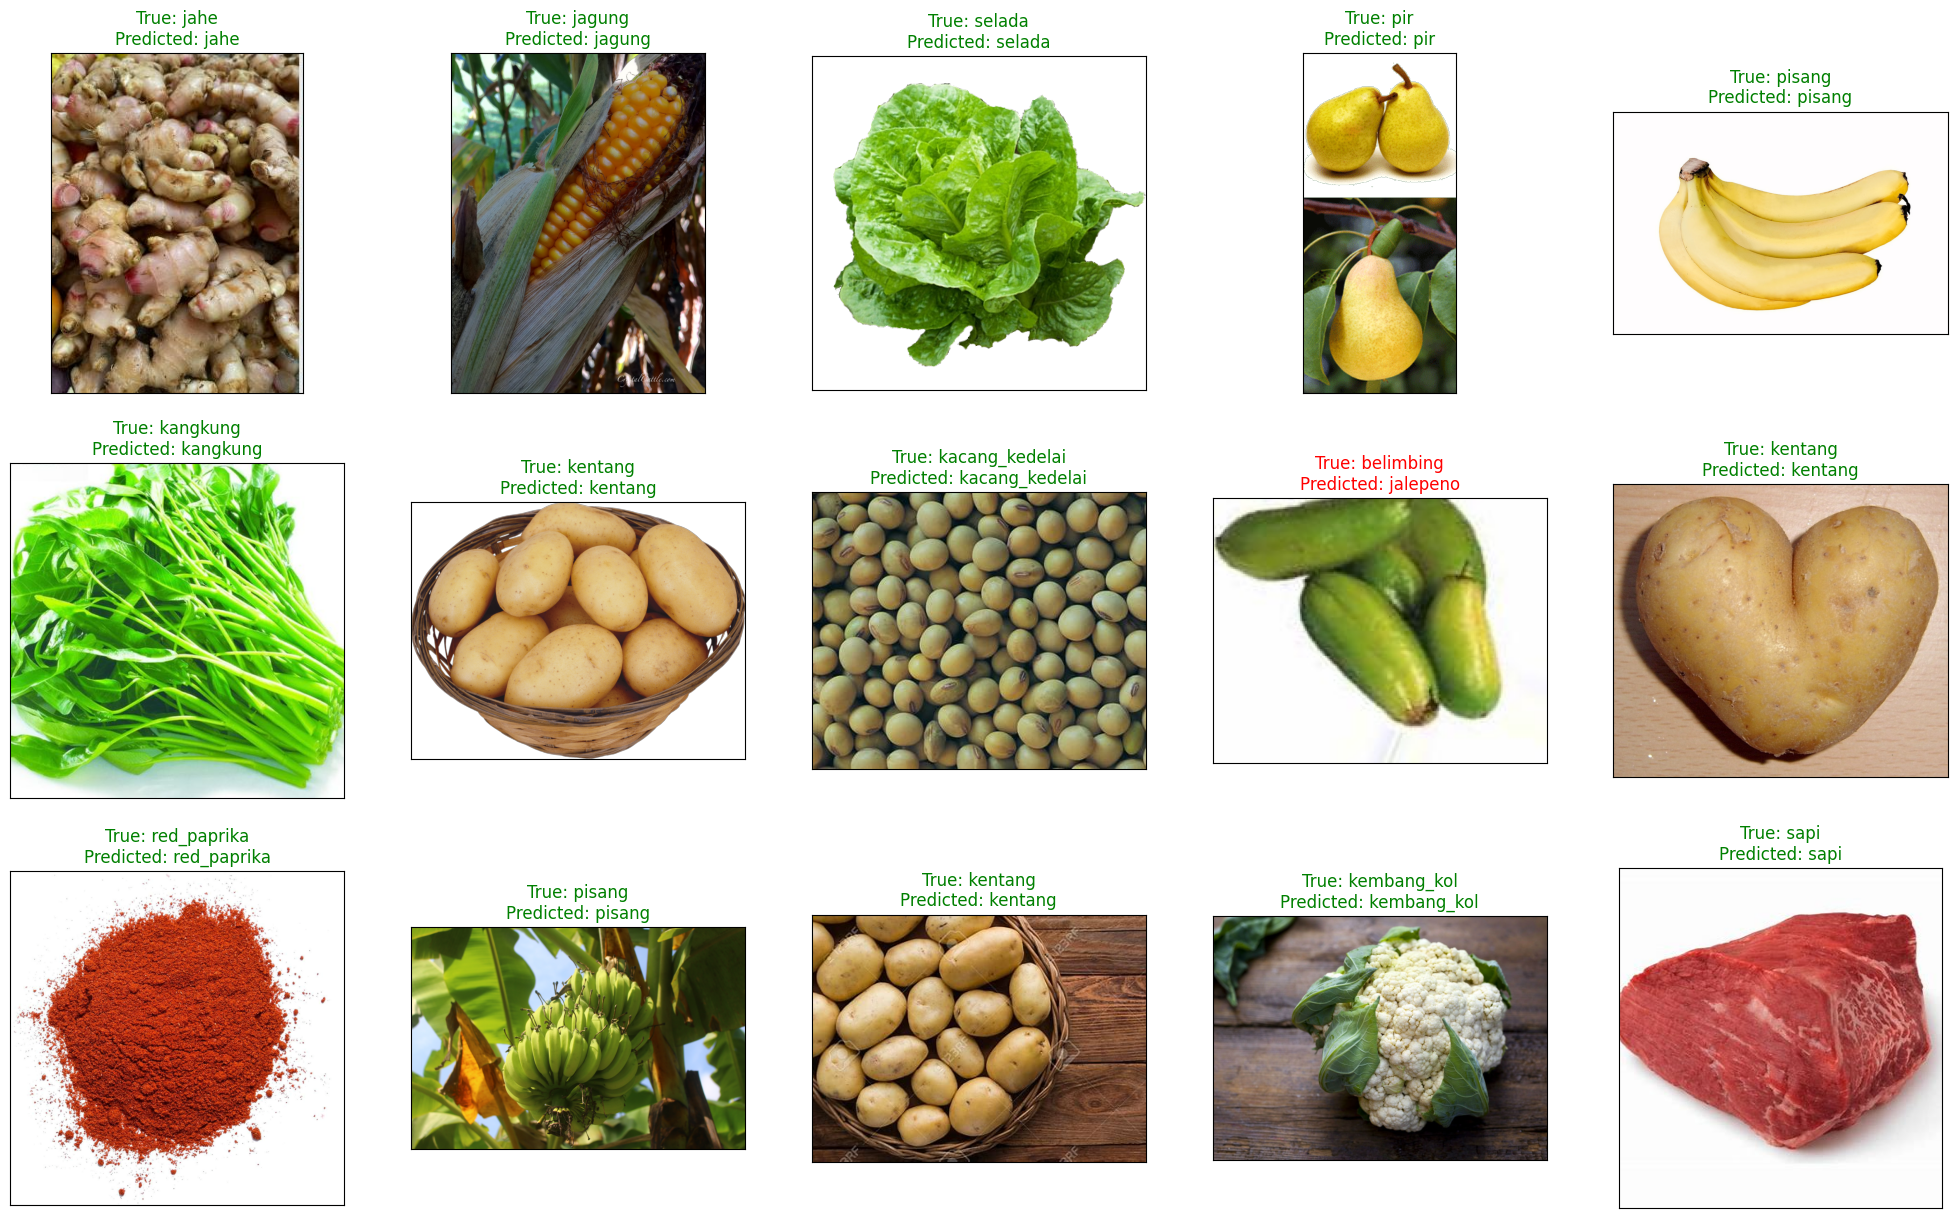

<Figure size 640x480 with 0 Axes>

In [30]:
  # Display 15 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(testing_dataset) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(testing_dataset.Filepath.iloc[random_index[i]]))
    if testing_dataset.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {testing_dataset.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [31]:
y_test = list(testing_dataset.Label)
print(classification_report(y_test, pred))

                precision    recall  f1-score   support

        anggur       0.92      0.92      0.92        12
          apel       0.69      0.90      0.78        10
          ayam       0.92      0.92      0.92        12
        bawang       0.89      1.00      0.94         8
         bayam       0.82      0.88      0.85        16
     belimbing       1.00      0.67      0.80        12
        bombay       1.00      0.75      0.86         8
       brokoli       0.81      0.94      0.87        18
      buah_bit       0.90      0.82      0.86        11
   cabai_rawit       0.62      1.00      0.76         8
        delima       0.92      0.79      0.85        14
          ikan       0.91      0.91      0.91        11
        jagung       0.47      0.58      0.52        12
  jagung_manis       0.67      0.47      0.55        17
          jahe       0.86      0.92      0.89        13
      jalepeno       0.80      0.80      0.80        10
         jeruk       1.00      1.00      1.00  

In [33]:
import shutil

# Zip the file
shutil.make_archive('model', 'zip', '/kaggle/working/')

# This creates a file named model.zip in /kaggle/working/

'/kaggle/working/model.zip'